In [1]:
import pyclesperanto_prototype as cle
from skimage.io import imread, imshow
import numpy as np
import time

# to measure kernel execution duration properly, we need to set this flag. It will slow down exection of workflows a bit though
cle.set_wait_for_kernel_finish(True)

# selet a GPU with the following in the name. This will fallback to any other GPU if none with this name is found
cle.select_device('AMD')


randomImage = np.random.random((1024,1960))

def selectMatrix(matrixNum = 1) :
    if (matrixNum == 1):
        s=0.5
        return np.asarray([
            [s , 0, 0],
            [0, s, 0],
            [0, 0, 1]
        ])
    elif (matrixNum == 2):
        return np.asarray([
            [0.70710677 , 0.70710677, 0],
            [-0.70710677, 0.70710677, 0],
            [0, 0, 1]
        ])
    elif (matrixNum == 3):
        s=0.5
        matrix = np.asarray([
            [s , 0, 0, 0],
            [0, s, 0, 0],
            [0, 0, s, 0],
            [0, 0, 0, 1]
        ])

Executing affine_transform_3d_x.cl


cl.OCLArray([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
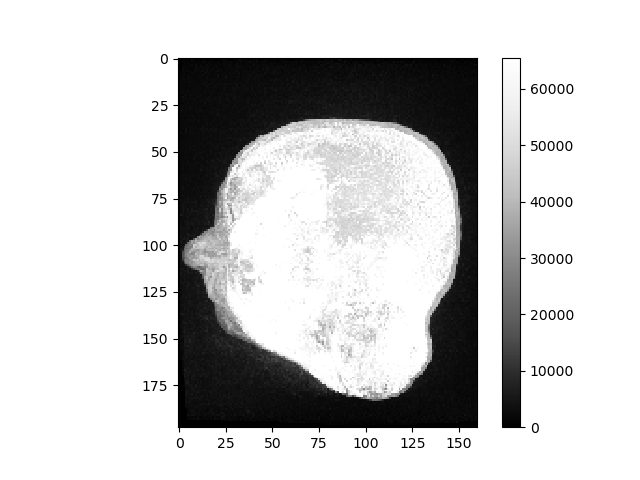
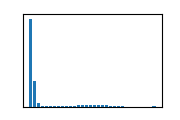

In [13]:
transform = cle.AffineTransform3D()
transform.rotate(0,45)

image = imread('../../data/Haase_MRT_tfl3d1.tif')
# # image = imread('../../data/membranes.tif')
cle.affine_transform(image, transform=transform, auto_size=True)
# cle.rotate(image, angle_around_x_in_degrees=45, linear_interpolation=True)
# # cle.scale(image,factor_x=0.5,factor_y=0.5, linear_interpolation=True)

Executing affine_transform_2d_x.cl


cl.OCLArray([[ 5159.066 , 10322.55  ,  3128.7583, ...,     0.    ,     0.    ,
            0.    ],
       [ 6873.0244,  8611.174 ,  2866.3184, ...,     0.    ,     0.    ,
            0.    ],
       [ 9174.999 ,  7256.3994,  2628.4563, ...,     0.    ,     0.    ,
            0.    ],
       ...,
       [    0.    ,     0.    ,     0.    , ...,     0.    ,     0.    ,
            0.    ],
       [    0.    ,     0.    ,     0.    , ...,     0.    ,     0.    ,
            0.    ],
       [    0.    ,     0.    ,     0.    , ...,     0.    ,     0.    ,
            0.    ]], dtype=float32)
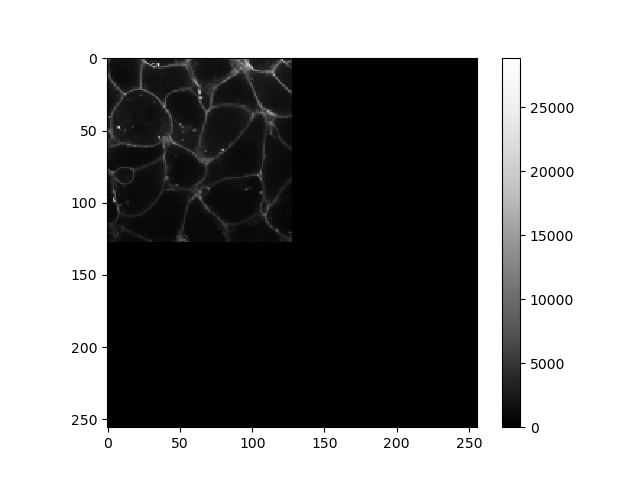
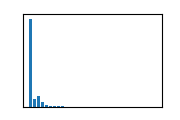

In [8]:
matrix = selectMatrix(1)
# image = imread('../../data/Haase_MRT_tfl3d1.tif')
image = imread('../../data/membranes.tif')
# cle.affine_transform(image, transform=transform)
cle.affine_transform(image, transform=matrix)

Executing affine_transform_2d_interpolate_x.cl


cl.OCLArray([[4846.75, 8727.  , 4843.  , ...,    0.  ,    0.  ,    0.  ],
       [5695.25, 9354.25, 3597.  , ...,    0.  ,    0.  ,    0.  ],
       [7264.  , 9801.75, 3078.25, ...,    0.  ,    0.  ,    0.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ]],
      dtype=float32)
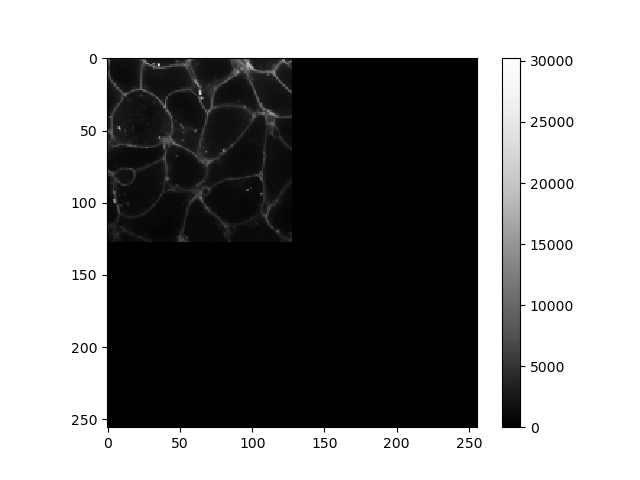
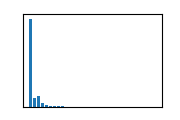

In [9]:
cle.affine_transform(image, transform=matrix, linear_interpolation=True)

In [ ]:
matrix = selectMatrix(1)

# threeDImage = imread('../../data/Haase_MRT_tfl3d1.tif')
# image = threeDImage[70]

image = imread('../../data/membranes.tif')
s=0.5
output_shape = tuple((np.asarray(image.shape) / s).astype(int))
ocl_image = cle.push(image)
ocl_scaled = cle.create(output_shape)
for i in range(0, 10):
    start_time = time.time()
    cle.affine_transform(ocl_image, ocl_scaled, transform=np.linalg.inv(matrix))
    # cle.affine_transform(ocl_image, ocl_scaled, transform=np.linalg.inv(matrix), linear_interpolation=True)
    print("clEsperanto affine transform duration: " + str(time.time() - start_time))

result = cle.pull(ocl_scaled)
imshow(result)

In [ ]:
s = 0.5
matrix = selectMatrix(1)
threeDImage = imread('../../data/Haase_MRT_tfl3d1.tif')
image = threeDImage[70]
# image = imread('../../data/membranes.tif')
output_shape = tuple((np.asarray(image.shape) / s).astype(int))
ocl_image = cle.push(image)
ocl_scaled = cle.create(output_shape)
for i in range(0, 10):
    start_time = time.time()
    cle.affine_transform(ocl_image, ocl_scaled, transform=np.linalg.inv(matrix), linear_interpolation=True)
    print("clEsperanto affine transform duration: " + str(time.time() - start_time))

result = cle.pull(ocl_scaled)
imshow(result)

Executing affine_transform_3d_x.cl


cl.OCLArray([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
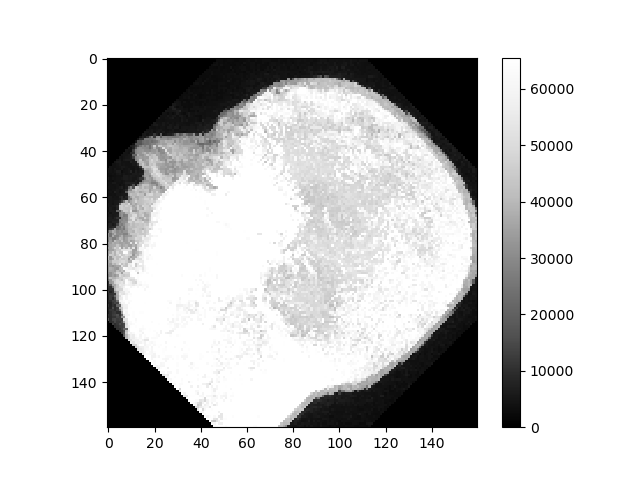
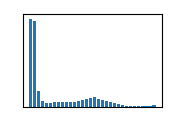

In [8]:
image = imread('../../data/Haase_MRT_tfl3d1.tif')
# image = imread('../../data/membranes.tif')
cle.rotate(image, angle_around_z_in_degrees=45)
# cle.scale(image,factor_x=0.5,factor_y=0.5)

In [ ]:
s = 2
matrix = selectMatrix(3)

image = np.asarray([[1,2],[3,4]])
cle.affine_transform(image, transform = matrix, auto_size=True)
# cle.rotate(image, angle_around_z_in_degrees=90)

c:\Users\hkalo\miniconda3\envs\hpp\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


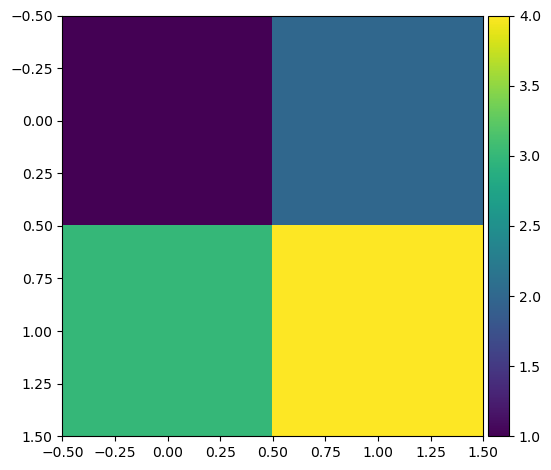

In [10]:
s=10
matrix = np.asarray([
    [s , 0, 0],
    [0, s, 0],
    [0, 0, 1]
])
image = np.asarray([[1,2],[3,4]])
result = cle.create((10,10))
imshow(image)

Executing affine_transform_2d_x.cl


cl.OCLArray([[1.015    , 1.025    , 1.035    , 1.045    , 1.055    , 1.0649999,
        1.075    , 1.085    , 1.095    , 1.105    ],
       [1.035    , 1.045    , 1.055    , 1.0649999, 1.0749999, 1.0849999,
        1.095    , 1.105    , 1.115    , 1.125    ],
       [1.055    , 1.0649999, 1.0749999, 1.0849999, 1.0949999, 1.1049999,
        1.115    , 1.125    , 1.135    , 1.145    ],
       [1.075    , 1.085    , 1.095    , 1.105    , 1.115    , 1.125    ,
        1.1350001, 1.1450001, 1.1550001, 1.1650001],
       [1.095    , 1.105    , 1.115    , 1.125    , 1.135    , 1.145    ,
        1.1550001, 1.1650001, 1.1750001, 1.1850001],
       [1.115    , 1.125    , 1.135    , 1.145    , 1.155    , 1.165    ,
        1.1750001, 1.1850001, 1.195    , 1.205    ],
       [1.135    , 1.145    , 1.155    , 1.165    , 1.175    , 1.185    ,
        1.195    , 1.205    , 1.215    , 1.225    ],
       [1.155    , 1.165    , 1.175    , 1.185    , 1.1949999, 1.2049999,
        1.215    , 1.225    , 1.235    , 1.245    ],
       [1.175    , 1.185    , 1.1949999, 1.2049999, 1.2149999, 1.2249999,
        1.235    , 1.245    , 1.255    , 1.265    ],
       [1.1949999, 1.2049999, 1.2149999, 1.2249999, 1.2349999, 1.2449999,
        1.2550001, 1.2650001, 1.2750001, 1.2850001]], dtype=float32)
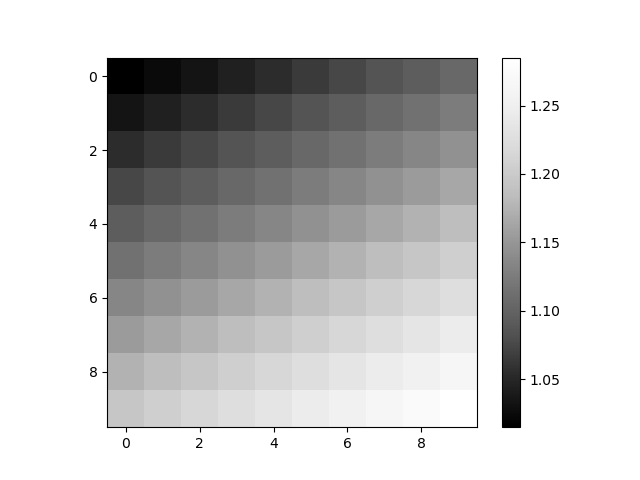
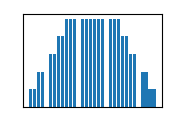

In [11]:
cle.affine_transform(image, result, transform = matrix)
result

Executing affine_transform_2d_interpolate_x.cl


cl.OCLArray([[0.30336   , 0.35714722, 0.41308594, 0.46902466, 0.5228119 ,
        0.5787506 , 0.63253784, 0.68847656, 0.7444153 , 0.7982025 ],
       [0.35714722, 0.4204712 , 0.48632812, 0.55218506, 0.61550903,
        0.68136597, 0.74468994, 0.8105469 , 0.8764038 , 0.9397278 ],
       [0.41308594, 0.48632812, 0.5625    , 0.6386719 , 0.71191406,
        0.78808594, 0.8613281 , 0.9375    , 1.0136719 , 1.0869141 ],
       [0.46902466, 0.55218506, 0.6386719 , 0.7251587 , 0.8083191 ,
        0.8948059 , 0.9779663 , 1.0644531 , 1.15094   , 1.2341003 ],
       [0.5228119 , 0.61550903, 0.71191406, 0.8083191 , 0.90101624,
        0.99742126, 1.0901184 , 1.1865234 , 1.2829285 , 1.3756256 ],
       [0.60672   , 0.71429443, 0.8261719 , 0.9380493 , 1.0456238 ,
        1.1523438 , 1.25      , 1.3515625 , 1.453125  , 1.5507812 ],
       [0.71429443, 0.8409424 , 0.97265625, 1.1043701 , 1.2310181 ,
        1.3476562 , 1.4453125 , 1.546875  , 1.6484375 , 1.7460938 ],
       [0.8261719 , 0.97265625, 1.125     , 1.2773438 , 1.4238281 ,
        1.5507812 , 1.6484375 , 1.75      , 1.8515625 , 1.9492188 ],
       [0.9380493 , 1.1043701 , 1.2773438 , 1.4503174 , 1.6166382 ,
        1.7539062 , 1.8515625 , 1.953125  , 2.0546875 , 2.1523438 ],
       [1.0456238 , 1.2310181 , 1.4238281 , 1.6166382 , 1.8020325 ,
        1.9492188 , 2.046875  , 2.1484375 , 2.25      , 2.3476562 ]],
      dtype=float32)
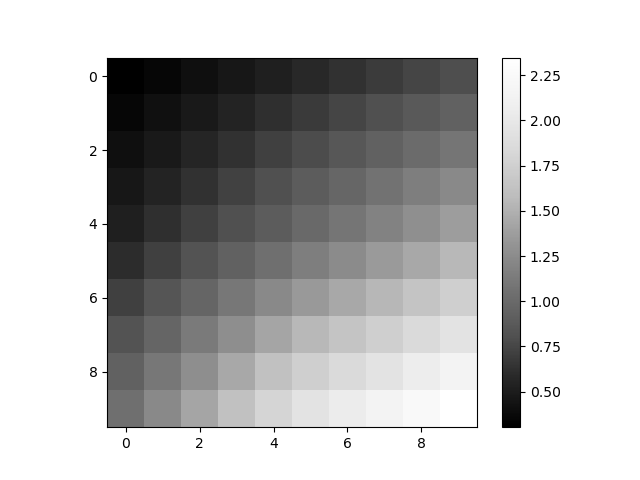
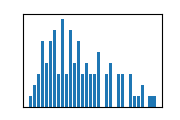

In [12]:
cle.affine_transform(image, result, transform = matrix, linear_interpolation=True)

Executing affine_transform_2d_x.cl


cl.OCLArray([[0.37035158, 0.51034564, 0.8990194 , 1.1549557 , 1.595654  ,
        2.2388856 , 2.4825745 , 2.9274945 , 3.5693843 , 3.3742917 ],
       [0.        , 0.65240735, 0.6850301 , 1.2760158 , 2.011493  ,
        2.054306  , 2.6981685 , 3.3397427 , 3.0060818 , 3.1387117 ],
       [0.        , 0.        , 0.92598903, 1.2123567 , 1.6562177 ,
        2.4707758 , 2.9114742 , 2.8090608 , 2.9446547 , 2.2104402 ],
       [0.        , 0.        , 0.        , 1.2018969 , 1.495114  ,
        2.3667715 , 2.6137006 , 2.582749  , 2.0655658 , 2.0962143 ],
       [0.        , 0.        , 0.        , 0.        , 1.717537  ,
        1.5867707 , 2.1015108 , 1.9219134 , 1.8385841 , 1.9669007 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.5250406 , 1.1667883 , 1.4960048 , 1.83011   , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.0856323 , 1.1110548 , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)
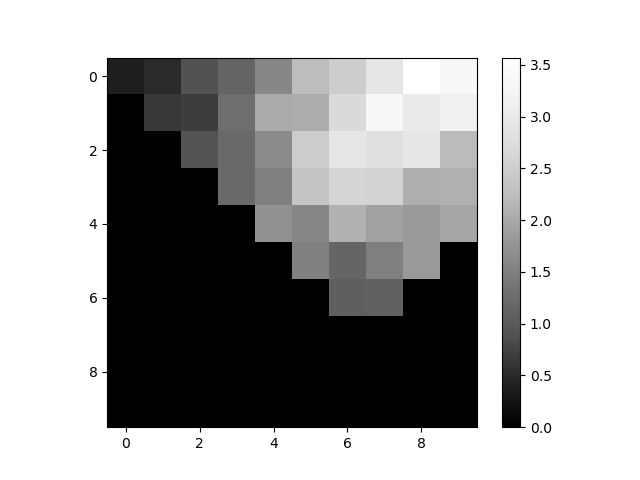
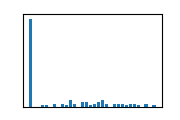

In [6]:
rotateMatrix = selectMatrix(2)
cle.affine_transform(result, transform=rotateMatrix)

Executing affine_transform_2d_interpolate_x.cl


cl.OCLArray([[0.1933443 , 0.5037427 , 0.7245061 , 1.0453833 , 1.4778137 ,
        1.9003754 , 2.3264465 , 2.755066  , 3.179779  , 3.6023407 ],
       [0.        , 0.2780767 , 0.72684586, 1.1068779 , 1.5662693 ,
        2.0447388 , 2.4716034 , 2.894165  , 3.3184814 , 3.4319768 ],
       [0.        , 0.        , 0.424837  , 1.0890133 , 1.551155  ,
        2.094378  , 2.6124573 , 3.035019  , 3.1621435 , 2.805337  ],
       [0.        , 0.        , 0.        , 0.5953574 , 1.4562027 ,
        1.9960537 , 2.615264  , 2.8960006 , 2.5774632 , 2.2192461 ],
       [0.        , 0.        , 0.        , 0.        , 0.7661165 ,
        1.8183701 , 2.221086  , 2.2296357 , 2.0324626 , 1.1602596 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.8524874 , 1.5502461 , 1.5587959 , 1.0036831 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.59829015, 0.6978521 , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)
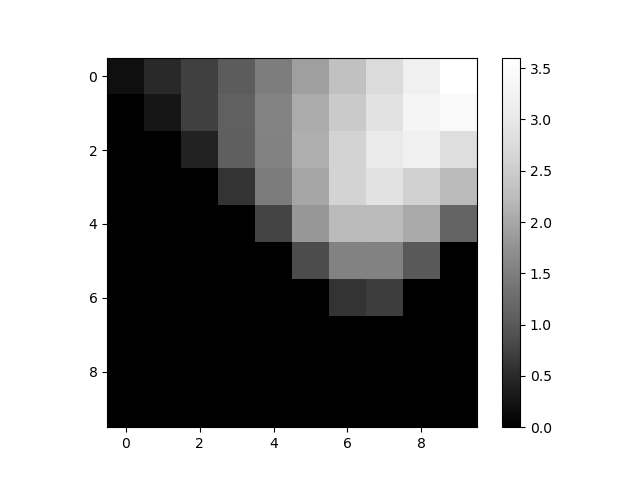
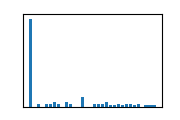

In [7]:
rotateMatrix = selectMatrix(2)
cle.affine_transform(result, transform=rotateMatrix, linear_interpolation=True)